# Examen 1
### Ejercicio 4

## Jonathan Alexis Urrutia Anguiano 41401102-5

In [1]:
from numpy import *
from pylab import *
%matplotlib inline
%run "funciones_a_llamar.ipynb"

In [35]:
def circ(r):
    ang = arange(- pi, pi , .1/2)
    return array([cos(ang),sin(ang)])*r

def caja (b):
    a = b/2.
    
    rext = circ(b)
    rint = circ(a)
    
    return plot(rext[0,:],rext[1,:],rint[0,:],rint[1,:],color = 'black',linewidth=5)
    

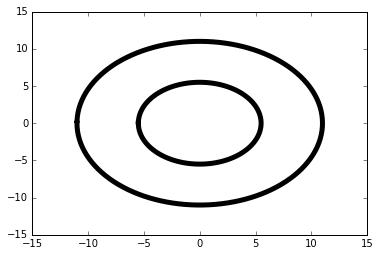

In [39]:
caja(11)
show()

### a,ii)  Ec. de movimeinto en polares

Sean $\hat{e_r} = \cos\theta \hat{e_x} + \sin\theta \hat{e_y},\, \hat{e_\theta} = -\sin\theta \hat{e_x} + \cos\theta \hat{e_y} \mbox{ y } r =\sqrt{x^2+y^2}$. 
Entonces
$\vec r = r \hat{e_r},\, \dot{\vec r} =\dot r \hat{e_r} + r\dot \theta \hat{e_\theta}\mbox{ y }\ddot{\vec r} = (\ddot r-r\dot\theta^2) \hat{e_r}+(2\dot r\dot\theta+r\ddot\theta) \hat{e_\theta}  $

$$ 
\begin{array}{c c r}
& m (\ddot r-r\dot\theta^2) = -m g & \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) =0 &  \mbox{en } \hat{e_\theta}\\
\end{array}
$$

Haciendo los cambios de variables $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\  v_2^2 u_1-g \\ -2\frac{ u_2}{u_1} v_2 
\end{array}\right) 
\end{align}


In [40]:
def e_mov(r, t, args = [1., 10.]):  #r = [r, theta, dot r, dot theta]   #args = [m, g]
    m, g = args[0], args[1]
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
   
    du1, dv1 = u2, v2
    du2 = v2*v2*u1 - g
    dv2 = -2*(u2/u1)*v2
        
    return array([du1, dv1, du2, dv2])

In [ ]:
def datos_graf(cond_ini, rext,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    rint = rext/2.
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if rint <= sol_dt[-1,:][0] <= rext:
            trayectoria[i+1,:] = sol_dt[-1,:]
        else:
            y_izq = rebote(trayectoria[i,:],mi_dt,ang) 
            trayectoria[i+1,:] = y_izq
            
    return trayectoria

In [ ]:
def rebote(r_v_i,mi_dt,rext,):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    
    if y_izq[0]< rext/2.:
        tope = rext/2.
    else:
        tope = rext

    while abs(y_izq[0]-tope)>1e-5:
        if (y_izq[0]-tope)*(y_med[0]-tope)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

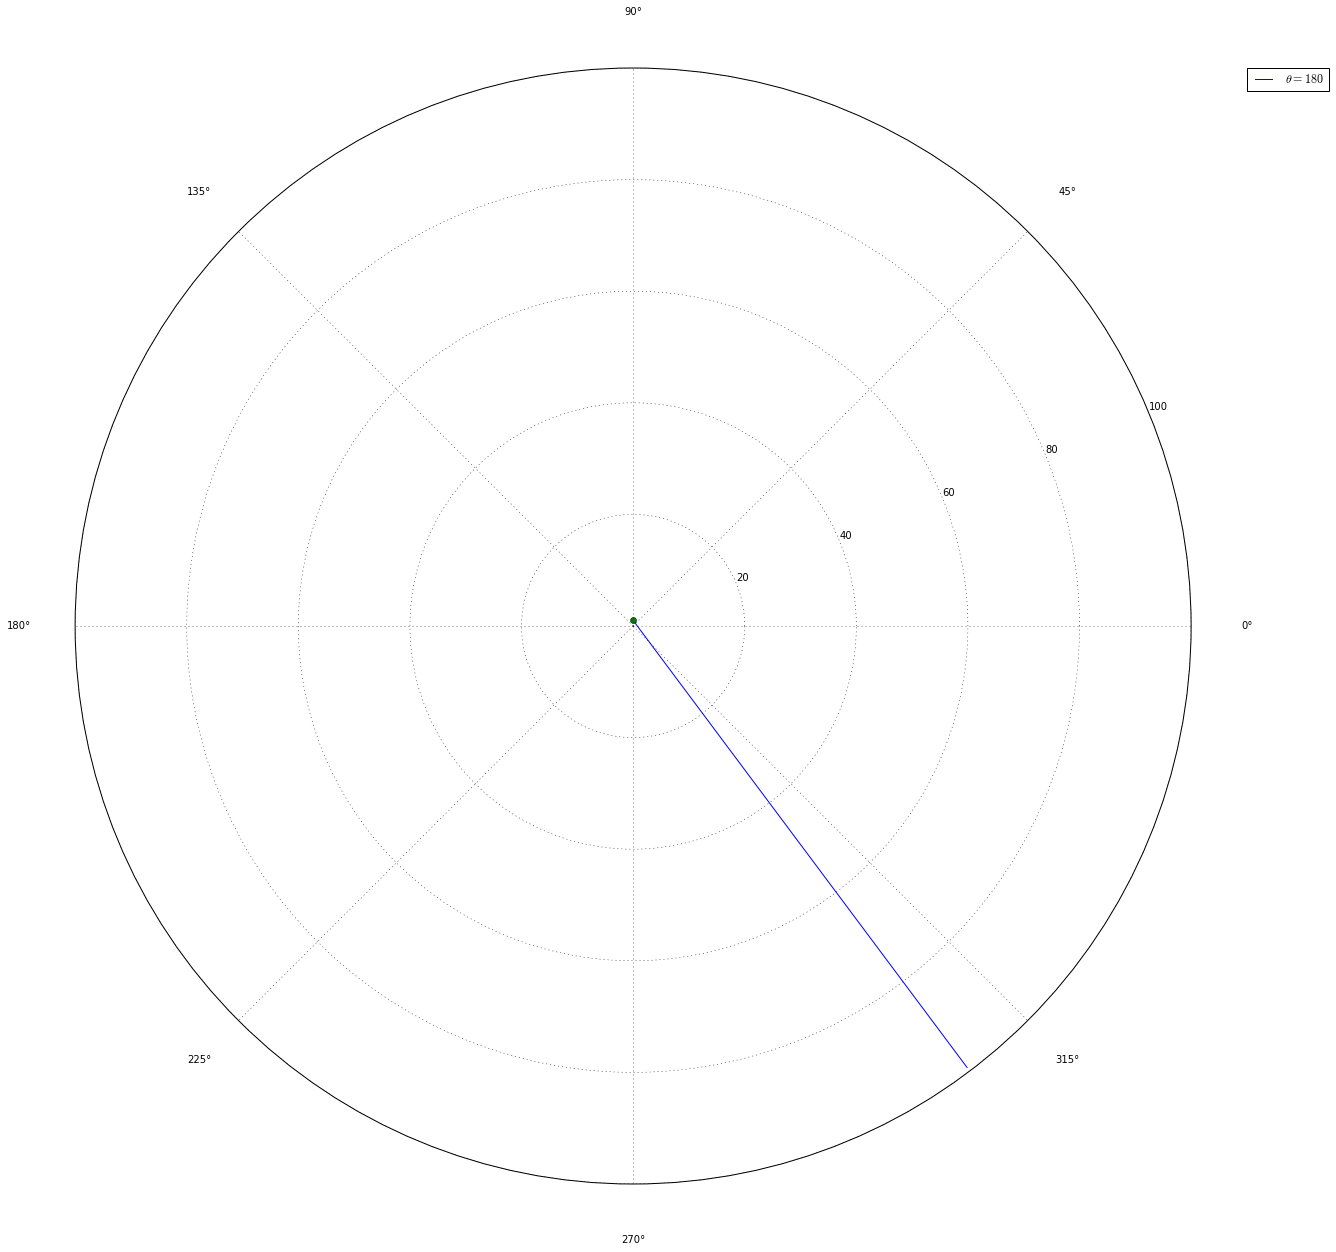

In [46]:
ang = [180]
t_f = 100

fig = figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
grid(True)
for a in ang:
    if abs(a%pi) != pi/2:
        cond_ini = [1,pi/2, sin(a) ,cos(a)]
        t_c, sol_c = rk4(resorte_polares, cond_ini, [0,t_f],[1.,0])
        ax.plot(sol_c[:,1], sol_c[:,0], linewidth=1,label = '$\\theta = %s$ ' %(a))
    #plot(sol_c[:,0]*cos(sol_c[:,1]),sol_c[:,0]*sin(sol_c[:,1]) , label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
plot(pi/2,1,'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

In [ ]:
def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-plano(y_izq[0],ang))>1e-5:
        if (y_izq[1]-plano(y_izq[0],ang))*(y_med[1]-plano(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq